In [1]:
import requests
import matplotlib.pyplot as plt


In [2]:
# Fetch the data from the API
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = response.json()


In [3]:
# Get the episodes data
episodes = data["_embedded"]["episodes"]

In [4]:

# Get all the overall ratings for each season
season_ratings = {}
for episode in episodes:
    season_number = episode["season"]
    rating = episode["rating"]["average"]

    if season_number in season_ratings:
        season_ratings[season_number].append(rating)
    else:
        season_ratings[season_number] = [rating]

In [5]:

# Plot the ratings for each season
seasons = sorted(season_ratings.keys())
ratings = [season_ratings[season_number] for season_number in seasons]


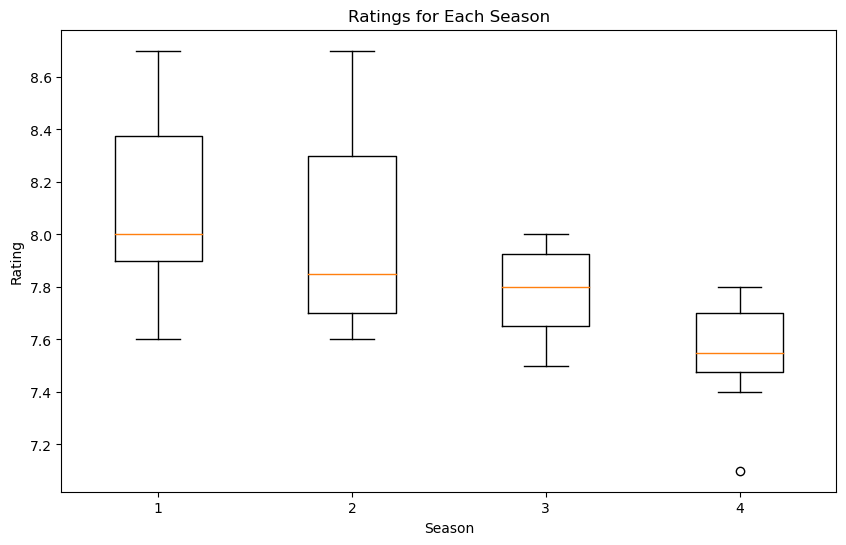

In [6]:

plt.figure(figsize=(10, 6))
plt.boxplot(ratings, labels=seasons)
plt.title("Ratings for Each Season")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.show()

In [7]:

# Get all the episode names with average rating more than 8 for every season
highly_rated_episodes = []
for season_number in season_ratings:
    season_episodes = season_ratings[season_number]
    for i, rating in enumerate(season_episodes):
        if rating > 8:
            highly_rated_episodes.append(episodes[i]["name"])

print("Episode names with average rating > 8 for every season:")
for episode_name in highly_rated_episodes:
    print(episode_name)



Episode names with average rating > 8 for every season:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind


In [8]:
# Get all the episode names that aired before May 2019
episodes_before_may_2019 = []
for episode in episodes:
    airdate = episode["airdate"]
    if airdate < "2019-05-01":
        episodes_before_may_2019.append(episode["name"])

print("Episode names that aired before May 2019:")
for episode_name in episodes_before_may_2019:
    print(episode_name)



Episode names that aired before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


In [9]:
# Get the episode name from each season with the highest and lowest rating
season_high_ratings = {}
season_low_ratings = {}
for season_number in season_ratings:
    season_episodes = season_ratings[season_number]
    highest_rating = max(season_episodes)
    lowest_rating = min(season_episodes)
    episode_index_with_highest_rating = season_episodes.index(highest_rating)
    episode_index_with_lowest_rating = season_episodes.index(lowest_rating)

    season_high_ratings[season_number] = episodes[episode_index_with_highest_rating]["name"]
    season_low_ratings[season_number] = episodes[episode_index_with_lowest_rating]["name"]

print("Episode with the highest rating in each season:")
for season_number in season_high_ratings:
    episode_name = season_high_ratings[season_number]
    print(f"Season {season_number}: {episode_name}")

print("Episode with the lowest rating in each season:")
for season_number in season_low_ratings:
    episode_name = season_low_ratings[season_number]
    print(f"Season {season_number}: {episode_name}")




Episode with the highest rating in each season:
Season 1: The Bicameral Mind
Season 2: Trace Decay
Season 3: The Original
Season 4: Contrapasso
Episode with the lowest rating in each season:
Season 1: The Stray
Season 2: Contrapasso
Season 3: The Adversary
Season 4: The Original


In [10]:
# Get the summary for the most popular episode in every season
most_popular_episodes = {}
for season_number in season_ratings:
    season_episodes = season_ratings[season_number]
    most_popular_index = season_episodes.index(max(season_episodes))
    most_popular_episodes[season_number] = episodes[most_popular_index]["summary"]

print("Summary for the most popular episode in each season:")
for season_number in most_popular_episodes:
    episode_summary = most_popular_episodes[season_number]
    print(f"Season {season_number}: {episode_summary}")

Summary for the most popular episode in each season:
Season 1: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
Season 2: <p>Bernard tries to cope with what he did under Robert's orders. Meanwhile, William and Dolores find a town, and Maeve remembers more of her past. Meanwhile, the Man reveals his past to Teddy.</p>
Season 3: <p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>
Season 4: <p>Dolores takes the first step on her path of discovery by deciding to write a new story for herself... where she isn't the damsel. Meanwhile, Elise discovers the Wo